<a href="https://colab.research.google.com/github/PriyathamVarma/PriyathamVarma/blob/main/task2_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook is for AI coursework chatbot task 2 models implemntation

In [577]:
# Mounting google drive for accessing files
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [578]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import seaborn
#import seaborn as sns
# imports
#import plotly.express as px 
# Tensorflow
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import datetime
import seaborn as sns
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [579]:
# Creating a wb variable to store the spreadsheet bu URL


wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1Uc0IftU39xiQNV5gV0ASTTcElOrpgKRseG3HeIfeF2g/edit#gid=387344816')
# Getting the sheet(if multiple sheets exists) by sheet name
sheet = wb.worksheet('train.csv')
# Getting all values that exist in the sheet
data = sheet.get_all_values()
# Converting the values into a dataframe
data_frame = pd.DataFrame(data)

In [580]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303825 entries, 0 to 303824
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       303825 non-null  object
 1   1       303825 non-null  object
 2   2       303825 non-null  object
 3   3       303825 non-null  object
 4   4       303825 non-null  object
 5   5       303825 non-null  object
 6   6       303825 non-null  object
 7   7       303825 non-null  object
 8   8       303825 non-null  object
 9   9       303825 non-null  object
dtypes: object(10)
memory usage: 23.2+ MB


In [581]:
pip install pandasql

In [582]:
import tensorflow as tf
import pandasql as ps

In [583]:
# Getting the first row to be the header

data_frame.columns = data_frame.iloc[0]

data_frame = data_frame.iloc[1:].reset_index(drop=True)

In [584]:
new_df = pd.DataFrame()

In [585]:
new_df = data_frame.drop(['day','month'], axis=1)

In [646]:
new_df.head(5)

,year,rail_id,station,planned_arr,planned_dep,actual_arr,month_fmt,day_fmt,required_time,timeStamp
0,2017,8734960,DRCHS,09:12,09:12,09:11,02,01,2017020109:12,33120
1,2017,8734960,WARHAM,09:27,09:29,09:27,02,01,2017020109:27,34020
2,2017,8734960,HMWTHY,09:34,09:35,09:33,02,01,2017020109:34,34440
3,2017,8734960,POOLE,09:39,09:39,09:38,02,01,2017020109:39,34740
4,2017,8734960,PSTONE,09:44,09:43,09:41,02,01,2017020109:44,35040


In [587]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303824 entries, 0 to 303823
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   year         303824 non-null  object
 1   rail_id      303824 non-null  object
 2   station      303824 non-null  object
 3   planned_arr  303824 non-null  object
 4   planned_dep  303824 non-null  object
 5   actual_arr   303824 non-null  object
 6   month_fmt    303824 non-null  object
 7   day_fmt      303824 non-null  object
dtypes: object(8)
memory usage: 18.5+ MB


In [588]:
new_df['required_time'] = new_df['year'] + new_df['month_fmt'] + new_df['day_fmt'] + new_df['planned_arr']

In [761]:
new_df.head(5)

,year,rail_id,station,planned_arr,planned_dep,actual_arr,month_fmt,day_fmt,required_time,timeStamp
0,2017,8734960,DRCHS,09:12,09:12,09:11,02,01,2017020109:12,33120
1,2017,8734960,WARHAM,09:27,09:29,09:27,02,01,2017020109:27,34020
2,2017,8734960,HMWTHY,09:34,09:35,09:33,02,01,2017020109:34,34440
3,2017,8734960,POOLE,09:39,09:39,09:38,02,01,2017020109:39,34740
4,2017,8734960,PSTONE,09:44,09:43,09:41,02,01,2017020109:44,35040


In [590]:
from datetime import datetime

In [591]:
import time
import datetime

"""date = datetime.datetime.strptime(x[0], "%H:%M")"""

actual_arr_list = []
for x in new_df['planned_arr'].values:
  if len(x) == 5:
    k = datetime.datetime.strptime(x, "%H:%M")
    t = (k.hour * 60 * 60) + (k.minute * 60)
  else:
    t = 0

  actual_arr_list.append(t)  

In [592]:
new_df['timeStamp'] = actual_arr_list

In [593]:
x = new_df['planned_arr'].values

In [594]:
import time
import datetime
date = datetime.datetime.strptime(x[0], "%H:%M")

In [595]:

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = data_frame['station'].values
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[1, :])])
print(inverted)

['DRCHS' 'WARHAM' 'HMWTHY' ... 'WDON' 'CLPHMJM' 'WATRLMN']
[12 61 28 ... 64  9 62]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['WARHAM']


In [596]:
final_main_df.head(5)

,timestamps,station,rail_ids
0,33120,12,8734960
1,34020,61,8734960
2,34440,28,8734960
3,34740,40,8734960
4,35040,41,8734960


In [597]:
# list of integer encode values

list_of_int_encoded = []

for t in range(0,len(integer_encoded)):
  list_of_int_encoded.append(integer_encoded[t][0])

In [598]:
final_main_df = pd.DataFrame()

In [599]:
final_main_df['timestamps'] = actual_arr_list
final_main_df['station'] = list_of_int_encoded
final_main_df['rail_ids'] = data_frame['rail_id']
final_main_df['station_name'] = values

#  models

In [600]:
x = integer_encoded

In [601]:
final_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303824 entries, 0 to 303823
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   timestamps    303824 non-null  int64 
 1   station       303824 non-null  int64 
 2   rail_ids      303824 non-null  object
 3   station_name  303824 non-null  object
dtypes: int64(2), object(2)
memory usage: 9.3+ MB


# Class starts from here

In [602]:
index_for_x = []
for i in range(0,len(final_main_df['rail_ids'])):
  if final_main_df['rail_ids'][i] == '8734960':
    index_for_x.append(i)

In [603]:
final_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303824 entries, 0 to 303823
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   timestamps    303824 non-null  int64 
 1   station       303824 non-null  int64 
 2   rail_ids      303824 non-null  object
 3   station_name  303824 non-null  object
dtypes: int64(2), object(2)
memory usage: 9.3+ MB


In [604]:
y_list = []
x_list = []
for u in range(0,len(final_main_df['timestamps'])):
  if u in index_for_x:
    y_list.append(final_main_df['timestamps'][u])
    x_list.append(final_main_df['station'][u])



# Test

In [605]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score

In [606]:
# Splitting into training and testing
#splitting into train and test
from sklearn.model_selection import train_test_split

# Without stratification divide into first partition and test set.
train_X,test_X, train_y, test_y= train_test_split (x_list,y_list, test_size=0.4,random_state=10)


In [607]:
train_X = np.array(train_X).reshape(-1,1)
train_y = np.array(train_y).reshape(-1,1)
test_X = np.array(test_X).reshape(-1,1)
test_y = np.array(test_y).reshape(-1,1)

In [608]:
#classifier 1
#LinearSVC

from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(train_X, train_y);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [609]:
precision_recall_fscore_support(test_y, svc.predict(test_X), average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.052642368838009254, 0.1, 0.06102452598929453, None)

In [610]:
#classifier 2
#NaiveBayes

from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(train_X, train_y);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [611]:
precision_recall_fscore_support(test_y, naive_bayes.predict(test_X), average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.5438434314714722, 0.5666666666666667, 0.5536577648064896, None)

In [612]:
#classifier 3
#stochastic gradient descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(train_X, train_y);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [613]:
precision_recall_fscore_support(test_y, sgd.predict(test_X), average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.05401452609735192, 0.1, 0.06311960492282939, None)

In [614]:
#classifier 4
#knn classifier
from sklearn.neighbors import KNeighborsClassifier

clf_nn = KNeighborsClassifier(n_neighbors=5)
clf_knn=clf_nn
clf_knn.fit(train_X,train_y)
y_hat = clf_knn.predict(test_X)
y_hat


from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy = accuracy_score(test_y, y_hat)
print('calculated accuracy:',accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


calculated accuracy: 0.9710806697108066


In [615]:
precision_recall_fscore_support(test_y, y_hat, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.510166455526455, 0.5333333333333333, 0.520151719901481, None)

In [616]:
#classifier 5
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier

random_variable = RandomForestClassifier(max_depth=100)

random_variable.fit(train_X,train_y)

new_random_variable = random_variable.predict(test_X)

new_random_variable


from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy2 = accuracy_score(test_y, new_random_variable)
print('Sklearn calculated accuracy:',accuracy2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Sklearn calculated accuracy: 0.971841704718417


In [617]:
precision_recall_fscore_support(test_y, new_random_variable, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.5438434314714722, 0.5666666666666667, 0.5536577648064896, None)

In [618]:
#classifier 6
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=100)

decision_tree.fit(train_X,train_y)

new_decision_tree = decision_tree.predict(test_X)

decision_tree


from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy3 = accuracy_score(test_y, new_decision_tree)
print('Sklearn calculated accuracy:',accuracy3)

Sklearn calculated accuracy: 0.971841704718417


In [619]:
precision_recall_fscore_support(test_y, new_decision_tree, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.5438434314714722, 0.5666666666666667, 0.5536577648064896, None)

In [620]:
#scores
#comparison of classifiers

from sklearn.metrics import accuracy_score

classifiers = [svc, sgd,  naive_bayes ,clf_nn,decision_tree, random_variable]

# for each classifier get the accuracy score
scores = [accuracy_score(clf.predict(test_X), test_y) for clf in classifiers]
    
index = np.argmax(scores)

print(scores,2)

print(classifiers[index])
print("highest score",round(scores[index],2))
accuracy_percentage = (round(scores[index],2))*100
print("ACCURACY PERCENTAGE FOR CLASSIFIER ",accuracy_percentage,"%") 

[0.21689497716894976, 0.2267884322678843, 0.971841704718417, 0.9710806697108066, 0.971841704718417, 0.971841704718417] 2
GaussianNB()
highest score 0.97
ACCURACY PERCENTAGE FOR CLASSIFIER  97.0 %


# Test for linear regression


In [621]:
new_df.head(5)

,year,rail_id,station,planned_arr,planned_dep,actual_arr,month_fmt,day_fmt,required_time,timeStamp
0,2017,8734960,DRCHS,09:12,09:12,09:11,02,01,2017020109:12,33120
1,2017,8734960,WARHAM,09:27,09:29,09:27,02,01,2017020109:27,34020
2,2017,8734960,HMWTHY,09:34,09:35,09:33,02,01,2017020109:34,34440
3,2017,8734960,POOLE,09:39,09:39,09:38,02,01,2017020109:39,34740
4,2017,8734960,PSTONE,09:44,09:43,09:41,02,01,2017020109:44,35040


In [622]:
y_array = np.array(y_list)

In [623]:
x_list = np.array(x_list).reshape(-1,1)

In [624]:
model = LinearRegression()
model.fit(x_list, y_array)
r_sq = model.score(x_list, y_array)
print(r_sq*100)

29.906440854576843


In [625]:
# predict
y_pred = model.predict(np.array(x_list).reshape(-1,1))

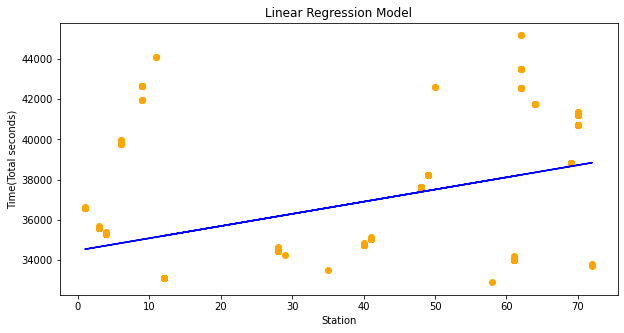

In [626]:
plt.figure(figsize=(10,5))
plt.scatter(x_list,y_array,color="orange")
plt.plot(x_list,y_pred,"blue")
plt.title('Linear Regression Model')
plt.xlabel('Station')
plt.ylabel('Time(Total seconds)')
plt.show()

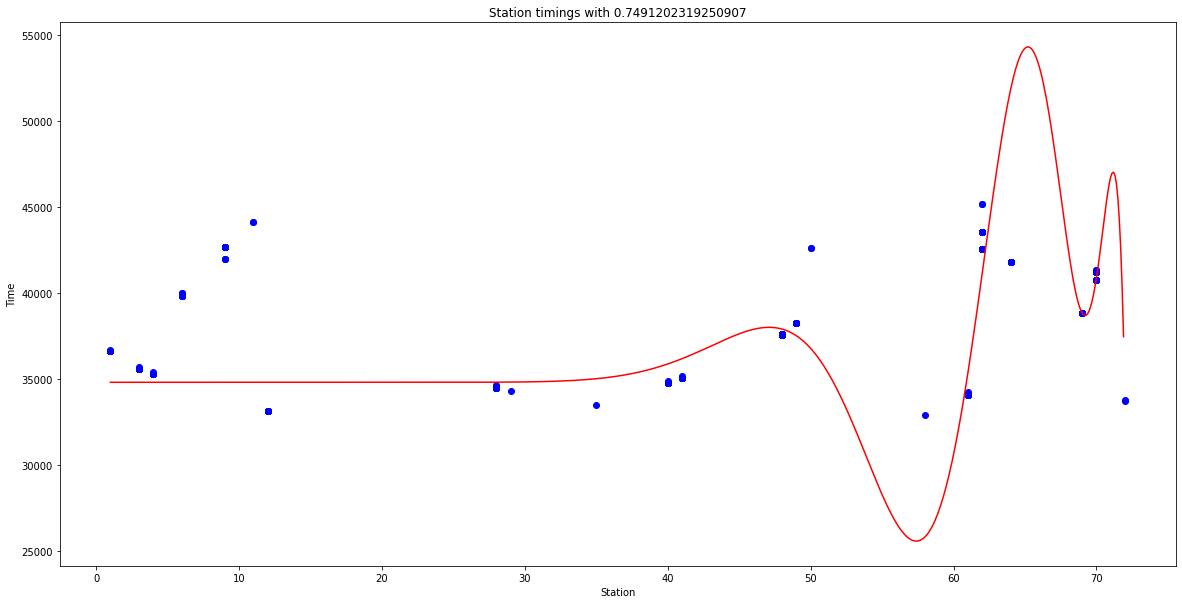

In [627]:
# polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=25)
X_poly = poly_reg.fit_transform(x_list)
 
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y_array)
 
  
X_grid = np.arange(min(x_list),max(x_list),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 

r2_value = r2_score(y_array, lin_reg2.predict(poly_reg.fit_transform(x_list)))#r2 values
plt.figure(figsize=(20,10))  
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='red') 
plt.scatter(x_list,y_array, color='blue')  
plt.title(f"Station timings with {r2_value}")
plt.xlabel('Station')
plt.ylabel('Time')
plt.show()

In [628]:
"""from sklearn.preprocessing import PolynomialFeatures
r2_list = []
features_list = []
for i in range(0,70):

    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(x_list)
    
    lin_reg2 = LinearRegression()
    lin_reg2.fit(X_poly,y_array)
    
      
    X_grid = np.arange(min(x_list),max(x_list),0.1)
    X_grid = X_grid.reshape(len(X_grid),1) 

    r2_value = r2_score(y_array, lin_reg2.predict(poly_reg.fit_transform(x_list)))#r2 values

    r2_list.append(r2_value*100)
    features_list.append(i)

    plt.figure(figsize=(20,10))  
    plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='red') 
    plt.scatter(x_list,y_array, color='blue')  
    plt.title(f"Station timings with {r2_value}")
    plt.xlabel('Station')
    plt.ylabel('Time')
    plt.show()"""

'from sklearn.preprocessing import PolynomialFeatures\nr2_list = []\nfeatures_list = []\nfor i in range(0,70):\n\n    poly_reg = PolynomialFeatures(degree=i)\n    X_poly = poly_reg.fit_transform(x_list)\n    \n    lin_reg2 = LinearRegression()\n    lin_reg2.fit(X_poly,y_array)\n    \n      \n    X_grid = np.arange(min(x_list),max(x_list),0.1)\n    X_grid = X_grid.reshape(len(X_grid),1) \n\n    r2_value = r2_score(y_array, lin_reg2.predict(poly_reg.fit_transform(x_list)))#r2 values\n\n    r2_list.append(r2_value*100)\n    features_list.append(i)\n\n    plt.figure(figsize=(20,10))  \n    plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color=\'red\') \n    plt.scatter(x_list,y_array, color=\'blue\')  \n    plt.title(f"Station timings with {r2_value}")\n    plt.xlabel(\'Station\')\n    plt.ylabel(\'Time\')\n    plt.show()'

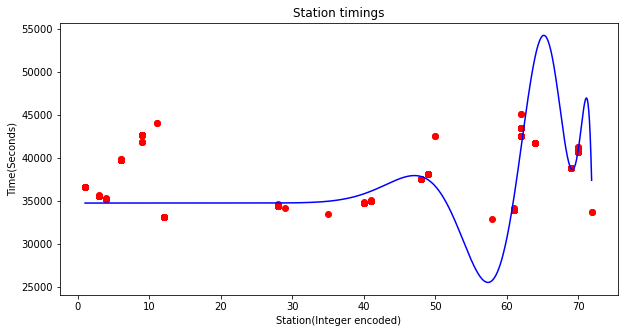

In [629]:
# polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=25)
X_poly = poly_reg.fit_transform(x_list)
 
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y_array)
 
  
X_grid = np.arange(min(x_list),max(x_list),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 

r2_value = r2_score(y_array, lin_reg2.predict(poly_reg.fit_transform(x_list)))#r2 values
plt.figure(figsize=(10,5))  
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue') 
plt.scatter(x_list,y_array, color='red')  
plt.title(f"Station timings")
plt.xlabel('Station(Integer encoded)')
plt.ylabel('Time(Seconds)')
plt.show()

In [630]:
# data frame for features and its r2 values
features_df = pd.DataFrame()
features_df['features'] = features_list
features_df['r2_value'] = r2_list

In [631]:
"""features_df.style.background_gradient(cmap="Blues")"""

'features_df.style.background_gradient(cmap="Blues")'

In [632]:
"""plt.figure(figsize=(10,5))

plt.plot(features_df)
plt.xlabel('Features')
plt.ylabel('R2 value(%)')
plt.title('Features vs r2 value(%) for Ploynomial regression')
plt.show()"""

"plt.figure(figsize=(10,5))\n\nplt.plot(features_df)\nplt.xlabel('Features')\nplt.ylabel('R2 value(%)')\nplt.title('Features vs r2 value(%) for Ploynomial regression')\nplt.show()"

In [633]:
y_poly_pred = lin_reg2.predict(poly_reg.fit_transform(np.array(x_list).reshape(-1,1)))

# Number to hours and minutes


In [634]:
def convertor(num):
  b = num/3600
  a = int(num/3600)
  c = b - a 
  d = int(c * 60)
  print(f'{a}:{d}')



In [635]:
convertor(y_array[0])


9:11


In [636]:
convertor(y_poly_pred[0])

9:39


# Test for stations


In [638]:
final_main_df['pta'] = data_frame['planned_arr']
final_main_df['ptd'] = data_frame['planned_dep']

In [644]:
final_main_df['pta'].values[0]

'09:12'

In [ ]:
"""import time
import datetime

"""date = datetime.datetime.strptime(x[0], "%H:%M")"""

actual_arr_list = []
for x in new_df['planned_arr'].values:
  if len(x) == 5:
    k = datetime.datetime.strptime(x, "%H:%M")
    t = (k.hour * 60 * 60) + (k.minute * 60)
  else:
    t = 0

  actual_arr_list.append(t)  """

In [648]:
planned_arr_list = []
planned_dep_list = []
for x,y in zip(final_main_df['pta'].values,final_main_df['ptd'].values):
  if len(x) == 5:
    k = datetime.datetime.strptime(x, "%H:%M")    
    t = (k.hour * 60 * 60) + (k.minute * 60)
    
  if len(y) == 5:
    k1 = datetime.datetime.strptime(y, "%H:%M")
    t1 = (k1.hour * 60 * 60) + (k1.minute * 60)

  else:
    t = 0
    t1 = 0

  planned_arr_list.append(t)
  planned_dep_list.append(t1)

In [650]:
planned_dep_list[1:10]

[34140, 34500, 34740, 34980, 35220, 35640, 36600, 37800, 38220]

In [651]:
planned_arr_list[1:10]

[34020, 34440, 34740, 35040, 35280, 35580, 36600, 37560, 38220]

In [652]:
planned_time_diff = [x-y for x,y in zip(planned_arr_list,planned_dep_list)]

In [655]:
final_main_df['planned_differnce'] = planned_time_diff

In [657]:
final_main_df.head(20)

,timestamps,station,rail_ids,station_name,pta,ptd,planned_differnce
0,33120,12,8734960,DRCHS,09:12,09:12,0
1,34020,61,8734960,WARHAM,09:27,09:29,-120
2,34440,28,8734960,HMWTHY,09:34,09:35,-60
3,34740,40,8734960,POOLE,09:39,09:39,0
4,35040,41,8734960,PSTONE,09:44,09:43,60
5,35280,4,8734960,BRANKSM,09:48,09:47,60
6,35580,3,8734960,BOMO,09:53,09:54,-60
7,36600,1,8734960,BKNHRST,10:10,10:10,0
8,37560,48,8734960,SOTON,10:26,10:30,-240
9,38220,49,8734960,SOTPKWY,10:37,10:37,0


# Function for calculating all required values

In [662]:
# get the sttaion realted row indices
list_for_stations = []
for i in range(0,len(final_main_df['station_name'])):
  if final_main_df['station_name'][i] == 'POOLE':
    list_for_stations.append(i)

In [697]:
# set the station name as index
indexed_df = final_main_df.set_index('station_name')

In [731]:
# get the unique train ids by station name
unique_train = np.unique(indexed_df.loc['POOLE'].rail_ids.values)

In [741]:
# get the number of unique trains
unique_trains = unique_train

In [754]:
numb = int(int(len(unique_train)/100)/2)

In [755]:
top_trains = unique_train[0:numb]

In [766]:
top_trains

array(['7900005', '7900006', '7900033'], dtype=object)

In [828]:
for rail_id in top_trains:
  # for loop - rail ids
  list_of_columns = final_main_df.columns
  latest_df = pd.DataFrame(columns = list_of_columns)
  for i in range(0,len(final_main_df['rail_ids'])):
    if final_main_df['rail_ids'][i] == rail_id:     
      series = pd.Series(final_main_df.iloc[i].values, index=latest_df.columns)
      latest_df = latest_df.append(series,ignore_index=True)
  print(f'*************** Data frame for {rail_id} ***************************')  
  print(latest_df)

*************** Data frame for 7900005 ***************************
   timestamps station rail_ids station_name    pta    ptd planned_differnce
0       33840      58  7900005        UPWEY  09:24                        0
1       34260      12  7900005        DRCHS  09:31                        0
2       34740      35  7900005      MORETON  09:39                        0
3       35100      72  7900005         WOOL  09:45                        0
4       35520      61  7900005       WARHAM  09:52                        0
5       35760      29  7900005      HOLTONH  09:56                        0
6       36060      28  7900005       HMWTHY  10:01                        0
7       36360      40  7900005        POOLE  10:06                        0
8       37560      39  7900005      POKSDWN  10:26                        0
9       37740       8  7900005      CHRISTC  10:29                        0
10      38160      37  7900005      NMILTON  10:36                        0
11      38640       1